In [1]:
!python -V


Python 3.10.10


In [2]:
!pip install python-jobspy

In [5]:
!pip install openpyxl

In [6]:
from jobspy import scrape_jobs
import openpyxl

jobs = scrape_jobs(
    site_name=["indeed", "linkedin", "zip_recruiter", "glassdoor"],
    search_term="computer vision",
    results_wanted=20,
    country_indeed='USA'  # only needed for indeed / glassdoor
)
print(f"Found {len(jobs)} jobs")
print(jobs.head())
jobs.to_excel("jobs.xlsx", index=False) # to_xlsx

2025-03-29 17:15:36,784 - INFO - JobSpy:Indeed - search page: 1 / 1
2025-03-29 17:15:36,787 - INFO - JobSpy:LinkedIn - search page: 1 / 2
2025-03-29 17:15:36,823 - INFO - JobSpy:Glassdoor - search page: 1 / 1
2025-03-29 17:15:36,828 - INFO - JobSpy:ZipRecruiter - search page: 1 / 1
2025-03-29 17:15:36,844 - ERROR - JobSpy:ZipRecruiter - ZipRecruiter response status code 403 with response: <!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width

2025-03-29 17:15:38,247 - INFO - JobSpy:Glassdoor - finished scraping
2025-03-29 17:15:38,265 - INFO - JobSpy:Indeed - finished scraping
2025-03-29 17:15:44,426 - INFO - JobSpy:LinkedIn - search page: 2 / 2
2025-03-29 17:15:45,158 - INFO - JobSpy:Linkedin - finished scraping


Found 60 jobs
                 id       site  \
0  gd-1009689929040  glassdoor   
1  gd-1009689432234  glassdoor   
2  gd-1009688103611  glassdoor   
3  gd-1009689046283  glassdoor   
4  gd-1009686790660  glassdoor   

                                             job_url job_url_direct  \
0  https://www.glassdoor.com/job-listing/j?jl=100...            NaN   
1  https://www.glassdoor.com/job-listing/j?jl=100...            NaN   
2  https://www.glassdoor.com/job-listing/j?jl=100...            NaN   
3  https://www.glassdoor.com/job-listing/j?jl=100...            NaN   
4  https://www.glassdoor.com/job-listing/j?jl=100...            NaN   

                                               title  \
0                 Implementation Consultant - Remote   
1                           Senior Database Engineer   
2                                        NOC Analyst   
3  Principal Data Scientist - Generative AI, Mach...   
4               IT Help Desk Coordinator (Temporary)   

                 

In [1]:
!pip install skillNer

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 130.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 149.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.8 MB/s eta 0:00:00
  Created wheel for skillNer: filename=skillNer-1.0.3-py3-none-any.whl size=25670 sha256=4e756cdd66109daffca533b330f86294b031f81a81f2b9a271eefec912b78926
  Stored in directory: /home/zeus/.cache/pip/wheels/9a/f1/7a/3201e01141cdb862654585eb16412785ed9973459639c351e4
Successfully built skillNer


In [2]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 219.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [7]:
# imports
import spacy
from spacy.matcher import PhraseMatcher

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor

# init params of skill extractor
nlp = spacy.load("en_core_web_lg")
# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

job_description = """
You are a Python developer with a solid experience in web development
and can manage projects. You quickly adapt to new environments
and speak fluently English and French
"""

annotations = skill_extractor.annotate(job_description)

# updated code: clearly display skill names with their types
for match_type, skills in annotations['results'].items():
    for skill in skills:
        skill_id = skill['skill_id']
        skill_name = SKILL_DB[skill_id]['skill_name']
        skill_type = SKILL_DB[skill_id]['skill_type']
        print(f"Skill: {skill_name} | Type: {skill_type} | Match: {match_type}") 



loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...
Skill: Web Development | Type: Hard Skill | Match: full_matches
Skill: Python (Programming Language) | Type: Hard Skill | Match: ngram_scored
Skill: Project Management | Type: Hard Skill | Match: ngram_scored
Skill: Adaptability | Type: Soft Skill | Match: ngram_scored
Skill: English Language | Type: Soft Skill | Match: ngram_scored
Skill: French Language | Type: Soft Skill | Match: ngram_scored


In [8]:
skill_extractor.describe(annotations)

In [5]:
import pandas as pd
df= pd.read_excel("all_ai_jobs_combined.xlsx")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   keyword_searched  869 non-null    object
 1   job_title         869 non-null    object
 2   technologies      816 non-null    object
 3   description       867 non-null    object
dtypes: object(4)
memory usage: 27.3+ KB


In [5]:
df.tail()

,keyword_searched,job_title,technologies,description
864,robotics,Robotics Engineering Technician,"CAD/CAM software, Welding equipment, Soldering...","Company Description:\nAt Western Digital, our ..."
865,robotics,Principal Robotics Systems Engineer,"C++, Python, ROS2, DDS, ZeroMQ, Docker, Kubern...",About this role:\nPickle is on the hunt for a ...
866,robotics,Robotics R&D Technician,"3D Printers, CAD Software, Hand Tools, Electri...",Apptronik is building robots for the real worl...
867,robotics,Robotics Solutions Architect,"FPGA, ROS, openCV",Job Details:\nJob Description:\nAbout the Comp...
868,robotics,Senior Robotics Engineer - Robot Perception Ad...,"C++, C#, Python, PyTorch, JAX",Who we are\nWith its A.I.-powered robotic tech...


In [ ]:
import spacy
import pandas as pd
from spacy.matcher import PhraseMatcher
from skillNer.general_params import SKILL_DB
from skillNer.skill_extractor_class import SkillExtractor

# Initialize NLP model and Skill Extractor
nlp = spacy.load("en_core_web_lg")
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)


# Function to extract skills
def extract_skills(text):
    annotations = skill_extractor.annotate(text)
    
    soft_skills = set()
    hard_skills = set()
    certifications = set()
    
    for match_type, skills in annotations['results'].items():
        for skill in skills:
            skill_id = skill['skill_id']
            skill_name = SKILL_DB[skill_id]['skill_name']
            skill_type = SKILL_DB[skill_id]['skill_type']

            if skill_type == 'Soft Skill':
                soft_skills.add(skill_name)
            elif skill_type == 'Hard Skill':
                hard_skills.add(skill_name)
            elif skill_type == 'Certification':
                certifications.add(skill_name)

    return ', '.join(soft_skills), ', '.join(hard_skills), ', '.join(certifications)

data=df.head(5)

# Apply function to each job description
data[['soft_skills', 'hard_skills', 'certifications']] = data['description'].apply(lambda x: pd.Series(extract_skills(x)))



loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/skillNer/utils.py:99: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  vec_similarity = token1.similarity(token2)


In [ ]:
import spacy
import pandas as pd
import csv
import re
from spacy.matcher import PhraseMatcher
from skillNer.general_params import SKILL_DB
from skillNer.skill_extractor_class import SkillExtractor

# Initialize NLP model and Skill Extractor
nlp = spacy.load("en_core_web_lg")
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)

# Function to clean text (handling special characters)
def clean_text(text):
    if not isinstance(text, str):
        return ""
    return re.sub(r'[^a-zA-Z0-9\s,.]', '', text)  # Remove special characters except space, comma, and period

# Function to extract skills from text
def extract_skills(text):
    text = clean_text(text)  # Preprocess text to avoid errors

    try:
        annotations = skill_extractor.annotate(text)
    except ValueError as e:
        print(f"Skipping problematic text due to error: {e}")
        return "", "", "", ""

    soft_skills, hard_skills, certifications, other_skills = set(), set(), set(), set()

    for skills in annotations.get('results', {}).values():
        for skill in skills:
            skill_id = skill.get('skill_id')

            if skill_id and skill_id in SKILL_DB:
                skill_name = SKILL_DB[skill_id]['skill_name']
                skill_type = SKILL_DB[skill_id]['skill_type']

                if skill_type == 'Soft Skill':
                    soft_skills.add(skill_name)
                elif skill_type == 'Hard Skill':
                    hard_skills.add(skill_name)
                elif skill_type == 'Certification':
                    certifications.add(skill_name)
            else:
                other_skills.add(skill.get('doc_node_value', 'Unknown Skill'))

    return ", ".join(sorted(soft_skills)), ", ".join(sorted(hard_skills)), ", ".join(sorted(certifications)), ", ".join(sorted(other_skills))

data = df.copy()

# Define output CSV file
csv_filename = "extracted_skills.csv"

# Open file and write header
with open(csv_filename, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["keyword_searched","job_title","technologies", "soft_skills", "hard_skills", "certifications", "other_skills"])  # Updated CSV Header

    # Process each row and write directly to CSV
    for _, row in data.iterrows():
        soft_skills, hard_skills, certifications, other_skills = extract_skills(row["description"])
        writer.writerow([row["keyword_searched"],row["job_title"],row["technologies"], soft_skills, hard_skills, certifications, other_skills])

print(f"Data saved successfully to {csv_filename}")

loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/skillNer/utils.py:99: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  vec_similarity = token1.similarity(token2)


## CLUSTERING JOBS


In [1]:
#drop jobs related to ASR:

import pandas as pd
df= pd.read_csv("extracted_skills.csv")

df = df[df["keyword_searched"] != "ASR"]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 868
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   keyword_searched  819 non-null    object 
 1   job_title         819 non-null    object 
 2   technologies      769 non-null    object 
 3   soft_skills       783 non-null    object 
 4   hard_skills       816 non-null    object 
 5   certifications    152 non-null    object 
 6   other_skills      0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 51.2+ KB


In [7]:
import spacy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

In [14]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 229.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


/tmp/ipykernel_3035/4197291518.py:25: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3035/4197291518.py:25: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3035/4197291518.py:25: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3035/4197291518.py:25: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3035/4197291518.py:25: UserWarning: Glyph 24072 (\N{CJK UNIFIED IDEOGRAPH-5E08}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3035/4197291518.py:25: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3035/4197291518.py:25: UserWarning: Glyph 24577 (\N{CJK UNIFIED IDEOGRAPH-6001}) missing from current font.
  plt.tight_l

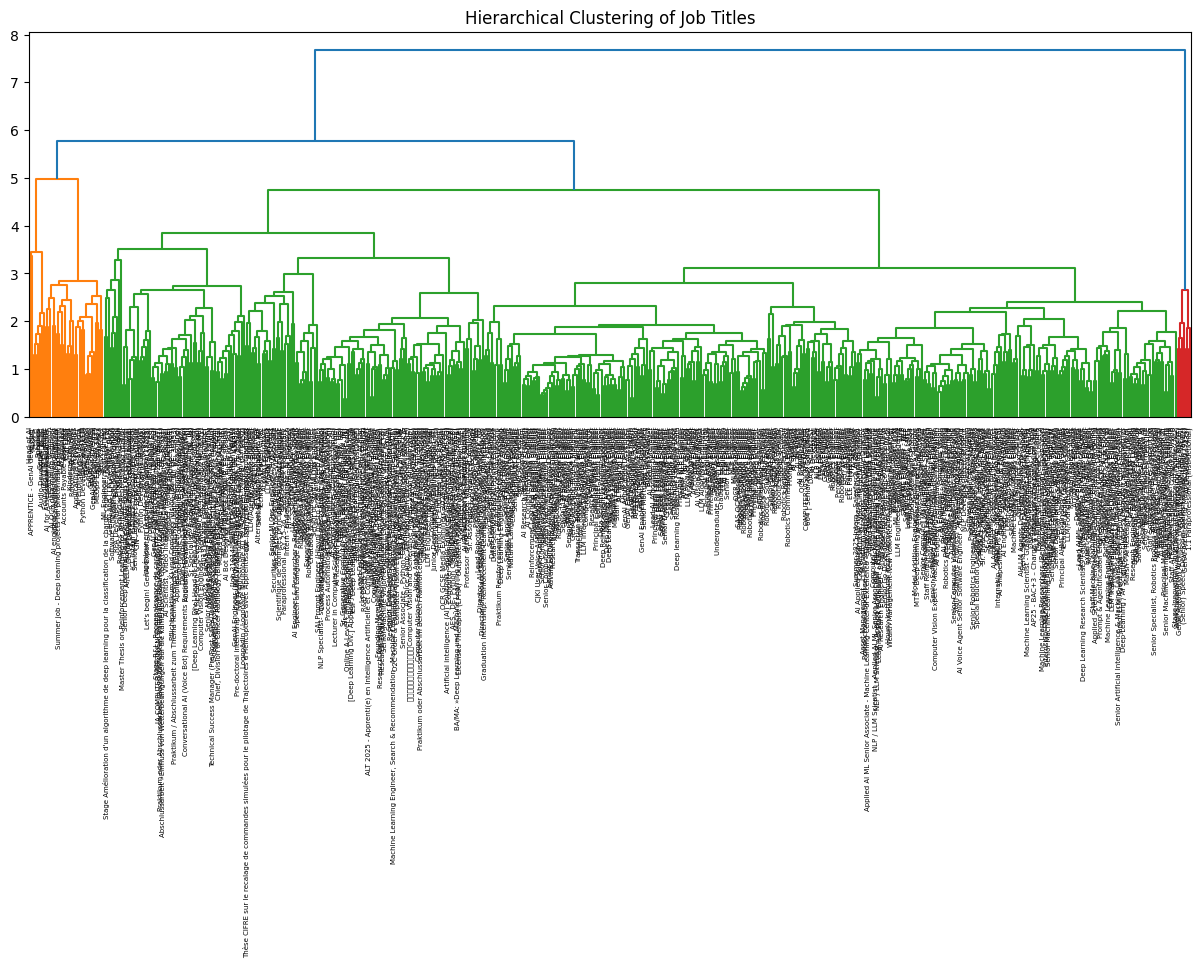

In [15]:
import spacy
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


nlp = spacy.load("en_core_web_sm")


job_titles = df["job_title"].dropna().unique()
vectors = np.array([nlp(title).vector for title in job_titles])
similarity_matrix = cosine_similarity(vectors)
distance_matrix = 1 - similarity_matrix

# Plot dendrogram to choose a good threshold
linked = sch.linkage(distance_matrix, method='average')

plt.figure(figsize=(15, 5))
sch.dendrogram(linked, labels=job_titles, orientation='top', distance_sort='descending')
plt.title("Hierarchical Clustering of Job Titles")
plt.tight_layout()
plt.show()

In [16]:
print(vectors.shape)

(559, 96)


In [20]:

threshold = 0.2

clustering_model = AgglomerativeClustering(
    affinity='precomputed',
    linkage='average',
    distance_threshold=threshold,
    n_clusters=None 
)
clusters = clustering_model.fit_predict(distance_matrix)

# Group titles
cluster_groups = defaultdict(list)
for idx, cluster_id in enumerate(clusters):
    cluster_groups[cluster_id].append(job_titles[idx])

# Show clusters
i=0
for cluster_id, titles in cluster_groups.items():
    print(f"\nCluster {cluster_id}")
    i=i+1
    for title in titles:
        print(f"  - {title}")

print('there are clusters',i)




Cluster 41
  - AI Engineer
  - AI Prompt Engineer
  - Gen AI Engineer
  - Azure AI Engineer
  - ATR Engineer

Cluster 9
  - AI Architect or AI Architect II
  - AI and LLM Architect
  - Data Scientist and AI Prompt Engineer

Cluster 79
  - AI engineer / AI product engineering

Cluster 90
  - AI Shapeshifter - Transform Any Role Through AI

Cluster 10
  - AI Consultant - AI Testing & Trustworthy AI
  - AI Solution Manager - AI & Cloud
  - Machine Learning Engineer, Search & Recommendation - Machine Learning & Deep Learning Engineering Department (MDE)
  - Deep Learning / AI Scientist - Liveness Detection and Biometrics
  - NLP & Large Language Model Intern
  - Python Developer – NLP & LLM Focus
  - LLM Training Frameworks and Optimization Engineer
  - Junior LLM Agent Engineer & Prompt Engineering Specialist
  - Software Engineer, LLM & Automation
  - Prompt Engineer II or Senior Prompt Engineer
  - AI Prompt Engineer & Python Developer
  - Prompt & Agentification Engineer - Master's Le

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/py

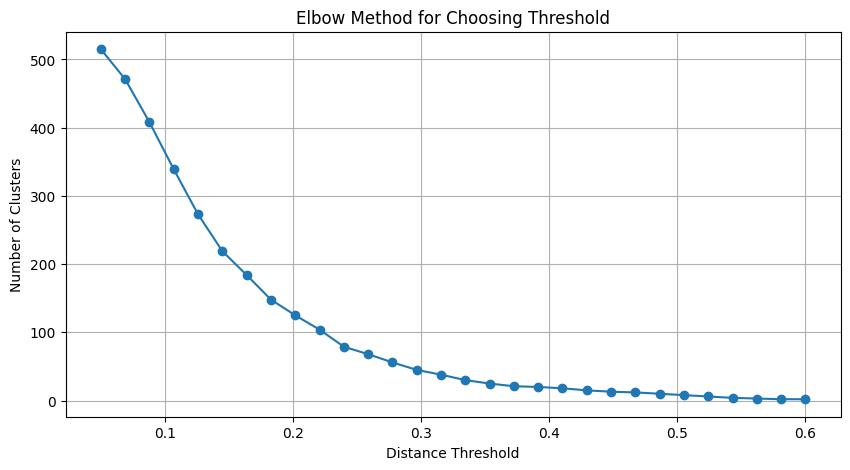

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

thresholds = np.linspace(0.05, 0.6, 30)
n_clusters_list = []

for t in thresholds:
    clustering = AgglomerativeClustering(
        affinity='precomputed',
        linkage='average',
        distance_threshold=t,
        n_clusters=None
    ).fit(distance_matrix)
    n_clusters_list.append(len(set(clustering.labels_)))

plt.figure(figsize=(10, 5))
plt.plot(thresholds, n_clusters_list, marker='o')
plt.xlabel("Distance Threshold")
plt.ylabel("Number of Clusters")
plt.title("Elbow Method for Choosing Threshold")
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from collections import defaultdict

cluster_groups = defaultdict(list)
for title, cluster_id in zip(job_titles, clusters):
    cluster_groups[cluster_id].append(title)

title_vectors = {title: nlp(title).vector for title in job_titles}

cluster_representatives = {}

for cluster_id, titles in cluster_groups.items():
    vectors = np.array([title_vectors[t] for t in titles])
    centroid = vectors.mean(axis=0).reshape(1, -1)
    similarities = cosine_similarity(vectors, centroid).flatten()
    best_idx = np.argmax(similarities)
    representative = titles[best_idx]

    cluster_representatives[cluster_id] = representative

In [31]:
for cluster_id, titles in cluster_groups.items():
    representative = cluster_representatives[cluster_id]
    print(f"\nCluster {cluster_id} → Representative: **{representative}**")
    for t in sorted(titles):
        print(f"  - {t}")


Cluster 42 → Representative: **AI Engineer**
  - AI Engineer
  - AI Engineer - AI procurement Startup
  - AI Engineer - Performance Optimization
  - AI Prompt Engineer
  - AI Security Engineer, Vulcan
  - AI engineer
  - AI engineer / AI product engineering
  - AO/AI Prompt Engineer
  - Applied AI Engineer
  - DF AI Vision Engineer
  - GenAI Engineer - AI Ecosystem
  - Internship - Gen AI Prompt Engineer
  - Navigation Engineer - AI
  - Senior AI Prompt Engineer
  - Voice AI Engineer

Cluster 19 → Representative: **AI Architect**
  - AI Architect
  - AI Architect - Distinguished Technologist
  - AI Architect or AI Architect II
  - AI and LLM Architect

Cluster 43 → Representative: **AI Voice Agent Senior Software Engineer - No AI Experience Necessary**
  - AI Shapeshifter - Transform Any Role Through AI
  - AI Software Engineer – Voice Platform
  - AI Voice Agent Senior Software Engineer - No AI Experience Necessary
  - AI/GenAI Expert in Software Quality
  - CJKI User Voice AI Knowle

In [34]:
from collections import Counter
import pandas as pd

# Step 1: Create a title → representative map
title_to_rep = {}
for cluster_id, titles in cluster_groups.items():
    rep = cluster_representatives[cluster_id]
    for t in titles:
        title_to_rep[t] = rep

# Step 2: Map each job in df to its cluster representative
df["cluster_rep"] = df["job_title"].map(title_to_rep)

# Step 3: Define function to explode and normalize skill columns
def explode_skills(df, col):
    return (
        df[[col, "cluster_rep"]]
        .dropna()
        .assign(skill=lambda x: x[col].str.split(","))
        .explode("skill")
        .assign(skill=lambda x: x["skill"].str.strip().str.lower())
    )

# Step 4: Explode each skill column
hard_df = explode_skills(df, "hard_skills")


# Step 5: Build the summary per representative cluster
cluster_summary = {}

for cluster_id, rep_title in cluster_representatives.items():
    # Get hard, soft, and cert skills for this representative cluster
    hard_skills = hard_df[hard_df["cluster_rep"] == rep_title]["skill"]


    top_hard = [s for s, _ in Counter(hard_skills).most_common(15)]



    cluster_summary[rep_title] = {
        "top_hard_skills": top_hard
    }

In [35]:
for rep_title, skills in cluster_summary.items():
    print(f"\n🧠 Representative Job Title: {rep_title}")
    print(f"🔧 Top 15 Hard Skills:\n  - " + "\n  - ".join(skills["top_hard_skills"]))




🧠 Representative Job Title: AI Engineer
🔧 Top 15 Hard Skills:
  - python (programming language)
  - machine learning methods
  - e (programming language)
  - computer science
  - automation
  - workflows
  - google cloud platform (gcp)
  - pytorch (machine learning library)
  - tensorflow
  - scalability
  - good manufacturing practices
  - disabilities
  - artificial intelligence markup language (aiml)
  - library
  - refining

🧠 Representative Job Title: AI Architect
🔧 Top 15 Hard Skills:
  - artificial intelligence markup language (aiml)
  - artificial intelligence
  - machine learning methods
  - translations
  - computer science
  - algorithms
  - disabilities
  - scalability
  - scale (map)
  - adoptions
  - google cloud platform (gcp)
  - job descriptions
  - language model
  - machine learning
  - analytics

🧠 Representative Job Title: AI Voice Agent Senior Software Engineer - No AI Experience Necessary
🔧 Top 15 Hard Skills:
  - computer science
  - python (programming languag

In [38]:
job_skill_edges = []

for rep_title, info in cluster_summary.items():
    for skill in info["top_hard_skills"]:
        job_skill_edges.append({"job_title": rep_title, "skill_name": skill})


edges_df = pd.DataFrame(job_skill_edges)
edges_df["skill_name"] = edges_df["skill_name"].str.lower().str.strip()

edges_df.head()

,job_title,skill_name
0,AI Engineer,python (programming language)
1,AI Engineer,machine learning methods
2,AI Engineer,e (programming language)
3,AI Engineer,computer science
4,AI Engineer,automation


In [39]:
edges_df.to_csv("job_skill_edges.csv", index=False)

## REFINED APPROACH FOR CLUSTERING


In [1]:
#drop jobs related to ASR:

import pandas as pd
df= pd.read_csv("extracted_skills.csv")

df = df[df["keyword_searched"] != "ASR"]

In [2]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


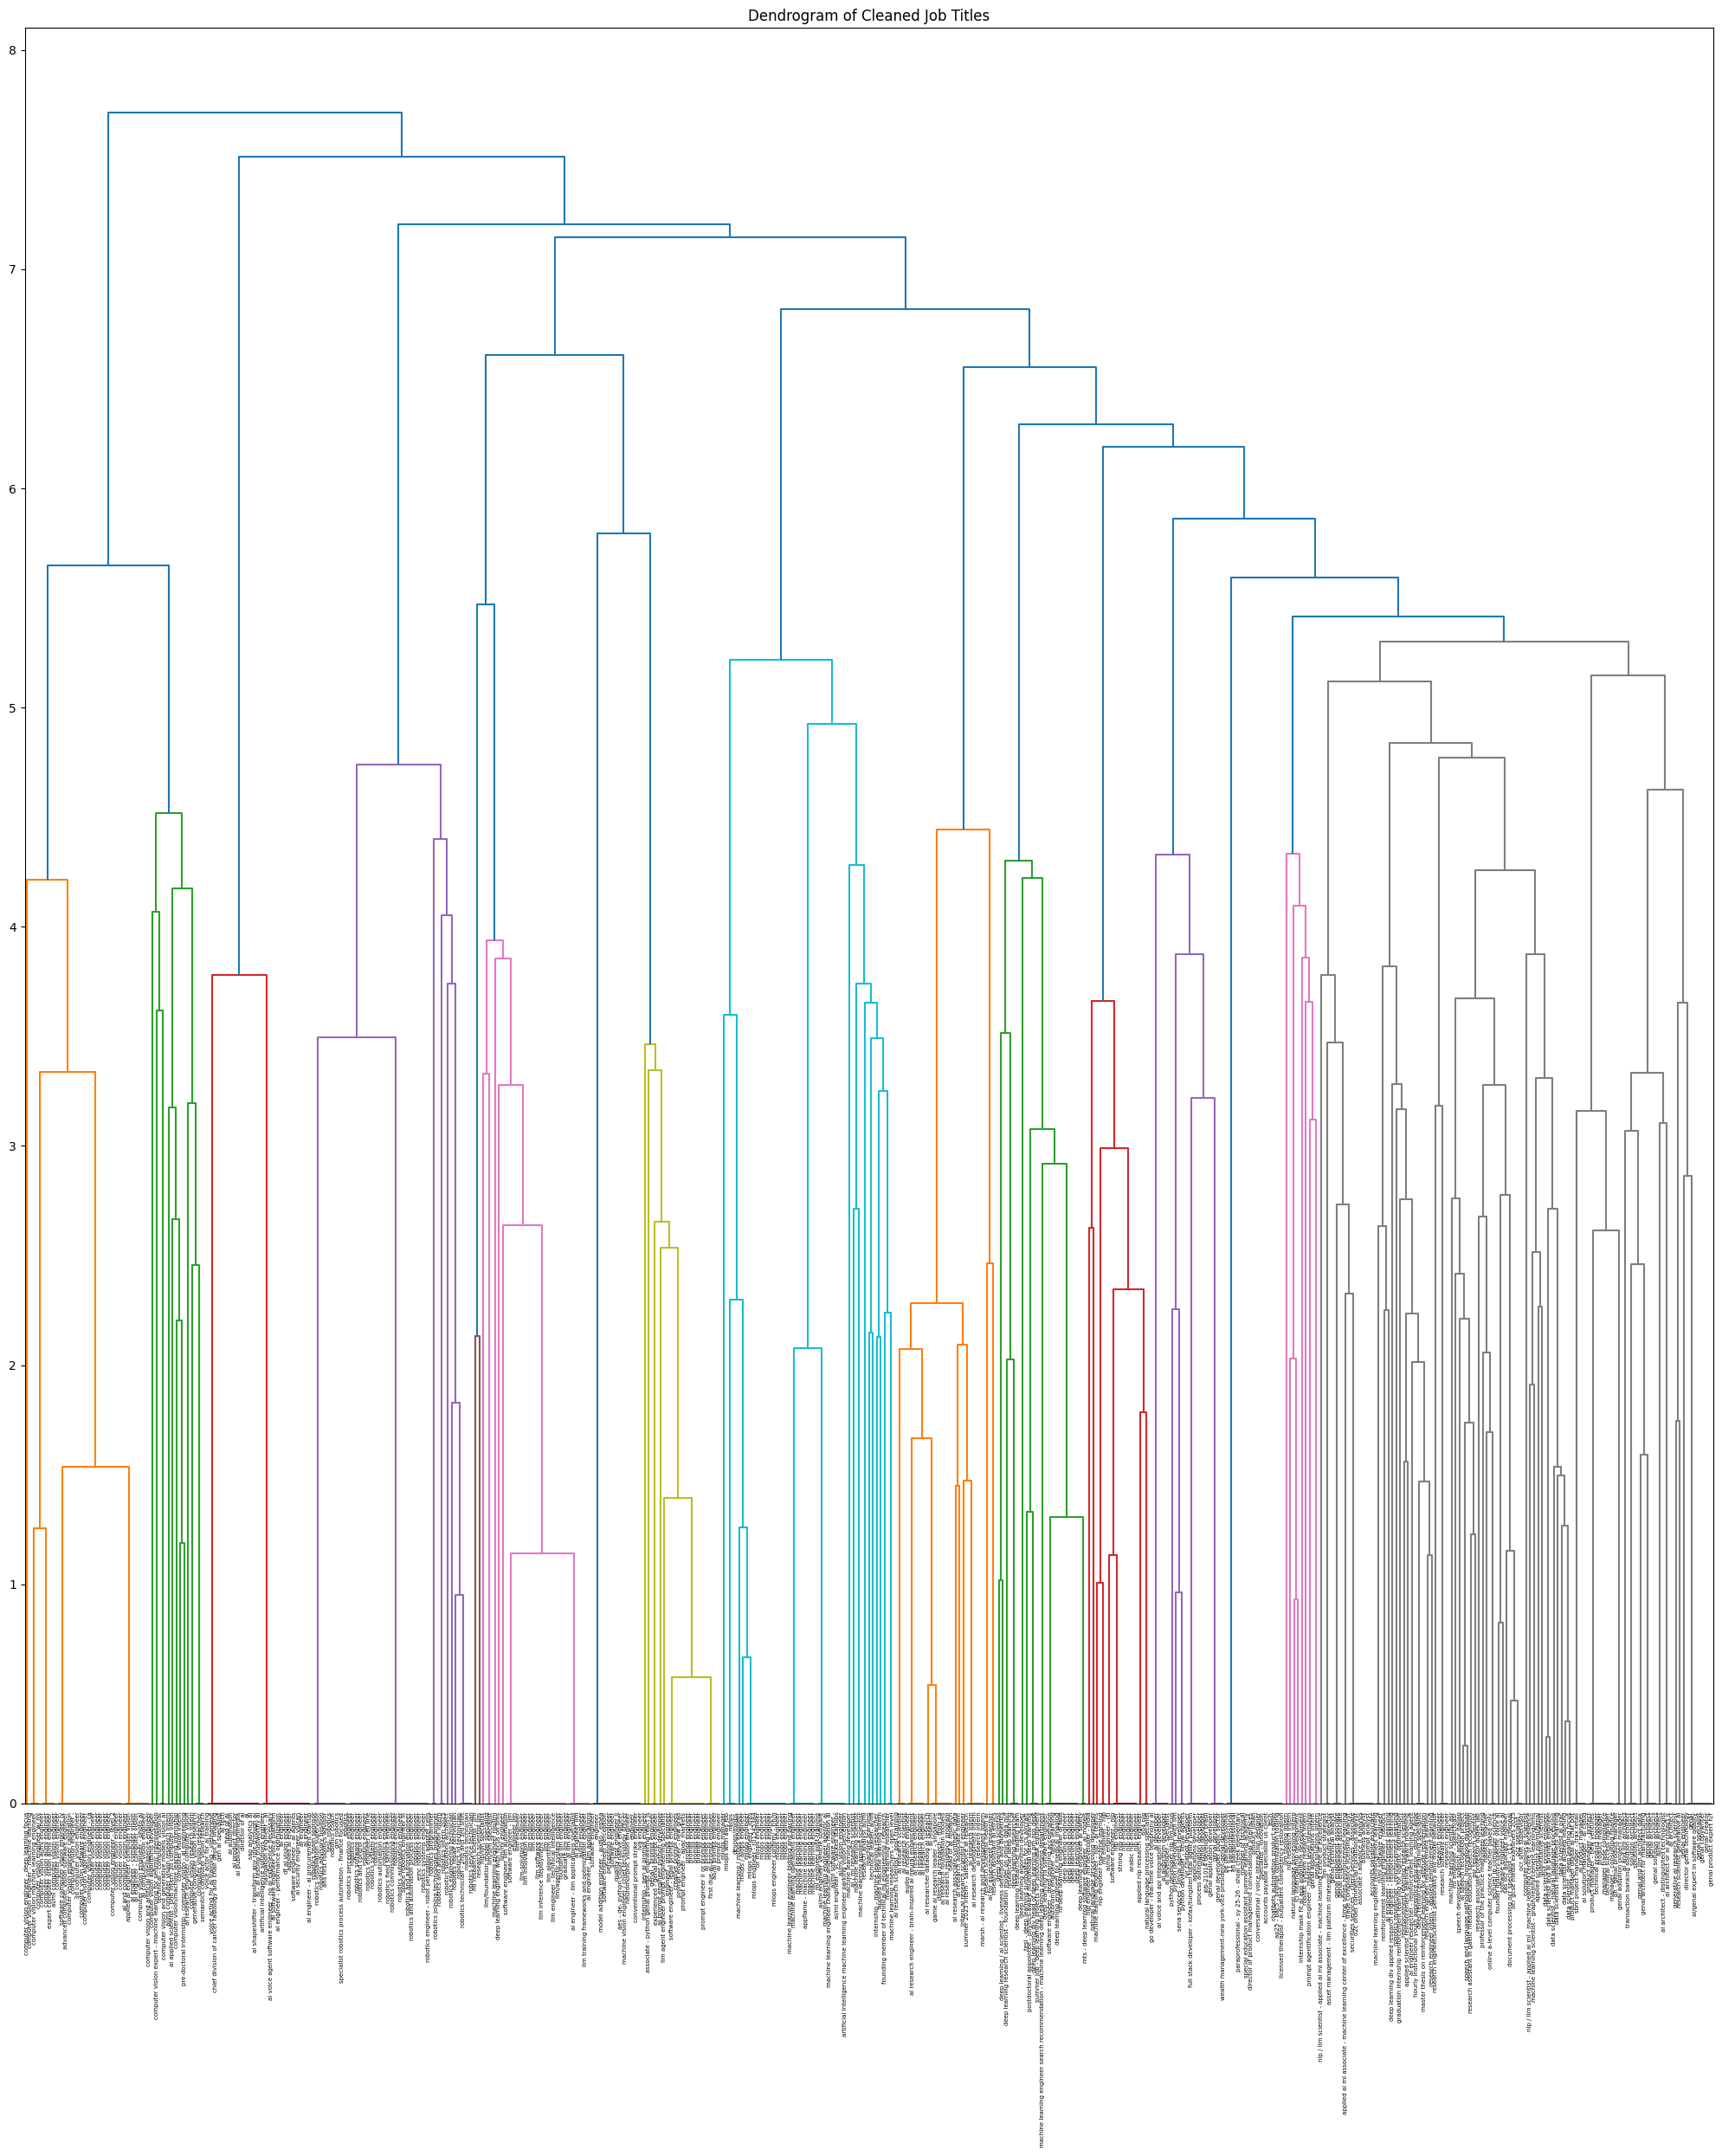

In [3]:
import pandas as pd
import numpy as np
import re
import spacy
from langdetect import detect
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load spaCy for cleanup
nlp = spacy.load("en_core_web_lg")

# Define hierarchy and soft skill categories
skill_hierarchy = {
    "ai": [],
    "ai research": ["ai"],
    "machine learning": ["ai"],
    "deep learning": ["machine learning"],
    "reinforcement learning": ["machine learning"],
    "nlp": ["machine learning"],
    "llm": ["nlp"],
    "genai": ["llm"],
    "prompt engineer": ["genai"],
    "speech recognition": ["nlp"],
    "text to speech": ["speech recognition"],
    "voice ai": ["speech recognition"],
    "computer vision": ["machine learning"],
    "ocr": ["computer vision"],
    "mlops": ["machine learning"],
    "data scientist": ["machine learning"],
    "robotics": ["ai"]
}

skill_groups = {
    "ai": {"ai", "artificial intelligence"},
    "ai research": {"ai research", "ai researcher"},
    "machine learning": {"machine learning", "ml"},
    "deep learning": {"deep learning", "dl"},
    "reinforcement learning": {"reinforcement learning", "rl"},
    "nlp": {"natural language processing", "nlp"},
    "llm": {"llm", "large language model", "gpt", "chatgpt"},
    "genai": {"genai", "generative ai"},
    "prompt engineer": {"prompt engineer", "prompt engineering"},
    "speech recognition": {"speech", "speech recognition", "asr"},
    "text to speech": {"text to speech", "tts"},
    "voice ai": {"voice ai", "voice assistant"},
    "computer vision": {"computer vision", "cv"},
    "ocr": {"ocr"},
    "mlops": {"mlops", "ml ops"},
    "data scientist": {"data scientist", "data science"},
    "robotics": {"robotics"}
}

job_roles = {
    "architect": {"architect"},
    "engineer": {"engineer"},
    "developer": {"developer", "programmer"},
    "scientist": {"scientist"},
    "technician": {"technician"},
    "manager": {"manager"},
    "analyst": {"analyst", "associate", "strategist"},
    "intern": {"intern", "internship"},
    "educator": {"teacher", "lecturer", "professor"},
    "researcher": {"research", "researcher"}
}

# === Cleaning functions ===
def is_english(text):
    try: return detect(text) == "en"
    except: return False

def remove_locations(text):
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            text = text.replace(ent.text, "")
    return text

def remove_durations(text):
    return re.sub(r'\b\d{1,2}(\s?(to|-)?\s?\d{1,2})?\s?(month|months|year|years|yrs|yr)\b', '', text, flags=re.IGNORECASE)

def clean_job_title(title):
    title = re.sub(r"&amp;", "and", title)
    title = re.sub(r"\(.*?\)", "", title)
    title = re.sub(r"\b(senior|sr\.?|junior|jr\.?|lead|principal|staff|freelancer|contractor|vp|avp|consultant)\b", "", title, flags=re.IGNORECASE)
    title = remove_durations(title)
    title = re.sub(r"\b(remote|full[- ]?time|part[- ]?time|freelance|contract|temporary|hybrid|onsite)\b", "", title, flags=re.IGNORECASE)
    title = remove_locations(title)
    title = re.sub(r"[^a-zA-Z0-9\s\-/]", "", title)
    return re.sub(r"\s+", " ", title).strip().lower()

def get_skill_depth(skill):
    depth = 0
    while skill_hierarchy.get(skill):
        skill = skill_hierarchy[skill][0]
        depth += 1
    return depth

def get_soft_vector(text, categories, use_hierarchy=False):
    vec = np.zeros(len(categories))
    for i, (cat, terms) in enumerate(categories.items()):
        match_score = sum(1 for term in terms if term in text)
        if match_score:
            weight = match_score * (get_skill_depth(cat)+1 if use_hierarchy else 1)
            vec[i] = weight
    return vec / vec.sum() if vec.sum() else vec

# === Run pipeline ===
skill_list = list(skill_hierarchy.keys())
job_titles = df["job_title"].dropna().unique()
job_titles_en = [t for t in job_titles if is_english(t)]

cleaned_titles = []
feature_vectors = []

for t in job_titles_en:
    cleaned = clean_job_title(t)
    skill_vec = get_soft_vector(cleaned, skill_groups, use_hierarchy=True)
    role_vec = get_soft_vector(cleaned, job_roles, use_hierarchy=False)
    final_vec = np.hstack([skill_vec, role_vec])
    cleaned_titles.append(cleaned)
    feature_vectors.append(final_vec)

X = np.vstack(feature_vectors)
X_scaled = StandardScaler().fit_transform(X)
dist_matrix = 1 - cosine_similarity(X_scaled)
linked = linkage(dist_matrix, method='average')

# === Plot ===
plt.figure(figsize=(20, 25))
dendrogram(linked, labels=cleaned_titles, leaf_rotation=90)
plt.title("Dendrogram of Cleaned Job Titles")
plt.tight_layout()
plt.show()

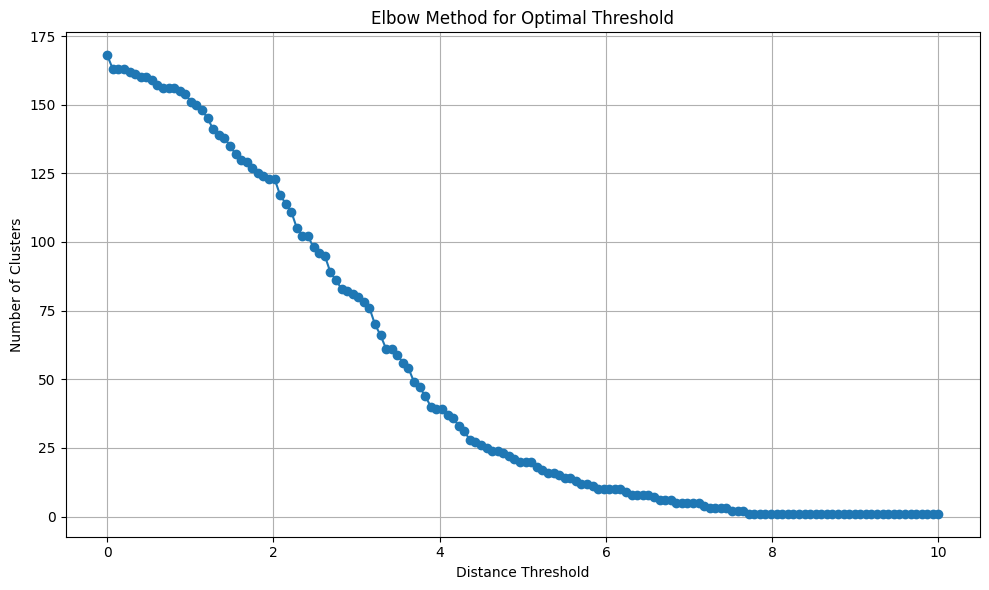

In [5]:
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import numpy as np

# === Generate thresholds and cluster counts ===
thresholds = np.linspace(0, 10, 150)
num_clusters = []

for t in thresholds:
    cluster_labels = fcluster(linked, t, criterion='distance')
    num_clusters.append(len(np.unique(cluster_labels)))

# === Plot elbow curve ===
plt.figure(figsize=(10, 6))
plt.plot(thresholds, num_clusters, marker='o')
plt.title("Elbow Method for Optimal Threshold")
plt.xlabel("Distance Threshold")
plt.ylabel("Number of Clusters")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Threshold clustering and show result

threshold=3.15

cluster_labels = fcluster(linked, threshold, criterion='distance')

from collections import defaultdict
cluster_groups = defaultdict(list)
for idx, label in enumerate(cluster_labels):
    cluster_groups[label].append(job_titles_en[idx])

for cluster_id, titles in sorted(cluster_groups.items()):
    print(f"\nCluster {cluster_id} ({len(titles)} jobs):")
    for title in sorted(titles):
        print(f"  - {title}")

print(f"\nTotal clusters: {len(cluster_groups)}")


Cluster 1 (7 jobs):
  - AI/ML Computer Vision Engineer
  - Computer Vision AI/ML Engineer
  - Computer Vision AI/ML Engineer (TS/SCI with Poly)
  - Computer Vision Engineer - Machine Learning (Rozzano, IT, 20089)
  - Expert Computer Vision AI/ML Engineer
  - Senior Computer Vision Machine Learning Engineer
  - Sr. Computer Vision Engineer w/ ML

Cluster 2 (24 jobs):
  - (4013) AI and Computer Vision Engineer
  - 3D Computer Vision Engineer
  - AI Computer Vision Engineer
  - AI Engineer - Computer Vision
  - Advanced Computer Vision Software Engineer
  - Applied AI Engineer – Computer Vision
  - Computer Vision Engineer
  - Computer Vision Engineer (3D)
  - Computer Vision Engineer (M/F)
  - Computer Vision Engineer (Object Detection & Tracking)
  - Computer Vision Engineer - (Remote - UK, Ireland and Hungary)
  - Computer Vision Engineer - Level 2
  - Computer Vision Engineer - Santa Clara, CA (Hybrid)
  - Computer Vision Engineer, Calibration
  - Computer Vision and Artificial Intel

In [6]:
print(X[21])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0.]


In [7]:
# Threshold clustering and show result

threshold=3.15

cluster_labels = fcluster(linked, threshold, criterion='distance')

from collections import defaultdict
cluster_groups = defaultdict(list)
for idx, label in enumerate(cluster_labels):
    cluster_groups[label].append(job_titles_en[idx])

for cluster_id, titles in sorted(cluster_groups.items()):
    print(f"\nCluster {cluster_id} ({len(titles)} jobs):")
    for title in sorted(titles):
        print(f"  - {title}")

print(f"\nTotal clusters: {len(cluster_groups)}")

Cluster 74 representative title: ai architect
   - AI Architect or AI Architect II
   - AI Architect
   - AI Architect - Distinguished Technologist
   - AI/ML Architect

Cluster 11 representative title: ai
   - AI Shapeshifter - Transform Any Role Through AI
   - AI Consultant - AI Testing & Trustworthy AI
   - SAP Analytics – AI Lead
   - AI Lead
   - Director of AI
   - AI Publishing_M.Media
   - AI Product Director (AI OS)
   - AI Automation Lead
   - Head of AI
   - AI Tech Lead
   - GEN AI Specialist (New York, US)
   - Chief, Division of Cancer Radiology (BIDMC) and Chair, Dept of Imaging (DFCI)
   - Voice Acting for AI Training - Vietnamese
   - Voice Actor for AI Training (Freelance, Remote)

Cluster 12 representative title: ai engineer
   - AI Engineer (AI-Powered Agents)
   - AI Engineer - AI procurement Startup
   - AI Engineer (NLP + Computer Vision)
   - AI Security Engineer, Vulcan
   - Software Engineer - AI Agents
   - Applied AI Engineer (Models, Prompts, Reasoning)
  

In [8]:
print(len(cluster_groups))

76


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 868
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   keyword_searched  819 non-null    object 
 1   job_title         819 non-null    object 
 2   technologies      769 non-null    object 
 3   soft_skills       783 non-null    object 
 4   hard_skills       816 non-null    object 
 5   certifications    152 non-null    object 
 6   other_skills      0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 51.2+ KB


In [9]:
# 1) Build the set of all valid (skill, role) combinations
skill_keys = list(skill_groups.keys())
role_keys  = list(job_roles.keys())
valid_rep_titles = {f"{skill} {role}" for skill in skill_keys for role in role_keys}

# 2) Rebuild substitution_map, keeping only truly valid rep titles
substitution_map = {}
for cleaned, label in zip(cleaned_titles, cluster_labels):
    rep = representative_titles[label].strip().lower()
    if rep in valid_rep_titles:
        substitution_map[cleaned] = rep

# 3) Filter DataFrame: keep only rows whose cleaned title maps to a valid rep title
def is_clustered_and_valid(title):
    if pd.isna(title) or not is_english(title):
        return False
    c = clean_job_title(title)
    return c in substitution_map

df = df[df["job_title"].apply(is_clustered_and_valid)].copy()

# 4) Replace each remaining job_title by its cluster’s representative title
df["job_title"] = df["job_title"].apply(
    lambda x: substitution_map[clean_job_title(x)]
)

In [10]:
# (Optional) Display a sample of the updated DataFrame
df['job_title'].unique()

array(['ai architect', 'ai engineer', 'ai researcher', 'ai manager',
       'genai architect', 'machine learning engineer',
       'machine learning researcher', 'machine learning developer',
       'machine learning scientist', 'deep learning engineer',
       'deep learning developer', 'deep learning researcher',
       'deep learning scientist', 'reinforcement learning researcher',
       'llm engineer', 'machine learning intern',
       'deep learning educator', 'nlp engineer', 'nlp intern',
       'nlp developer', 'llm scientist', 'llm developer', 'llm analyst',
       'llm intern', 'genai engineer', 'genai developer', 'genai manager',
       'genai intern', 'genai analyst', 'prompt engineer intern',
       'computer vision engineer', 'computer vision intern',
       'computer vision researcher', 'computer vision developer',
       'computer vision scientist', 'ai developer', 'ocr engineer',
       'ai intern', 'speech recognition scientist', 'mlops engineer',
       'mlops manage

In [14]:
df.head(30)

,keyword_searched,job_title,technologies,soft_skills,hard_skills,certifications,other_skills
1,AI,ai architect,"AI Software, Python, Jira, Confluence, Tableau","Agenda (Meeting), Composure, Critical Thinking...","Acceptance and Commitment Therapy (ACT), Adopt...",NaN,NaN
14,AI,ai architect,"AI frameworks, Cloud infrastructure, Data anal...","Business Acumen, Collaboration, Construction, ...","Adoptions, Algorithms, Amazon Marketplace, App...",NaN,NaN
16,AI,ai engineer,"Azure Machine Learning Studio, Google Vertex A...","Collaboration, Communications, Customer Servic...","Amazon Neptune, Artificial Intelligence, Artif...",Licensed Professional Engineer,NaN
17,AI,ai architect,"Vertex AI, Generative AI Studio, BigQuery ML, ...","Collaboration, Governance, Integration","Apache Airflow, Apigee, Application Programmin...",NaN,NaN
21,AI,ai researcher,"Natural Language Processing, AI, Algorithms","Collaboration, Communications, Innovation, Pla...","Advising, Algorithms, Artificial Intelligence,...",NaN,NaN
24,AI,ai architect,"AI Technologies, Machine Learning, Cloud Infra...","Adaptability, Collaboration, Communications, C...","Acceptance and Commitment Therapy (ACT), Advan...",NaN,NaN
28,AI,ai engineer,"Python, PyTorch, TensorFlow, scikit-learn, Pan...","Collaboration, Communications, English Languag...","Application Programming Interface (API), Artif...",NaN,NaN
29,AI,ai architect,"Python, TensorFlow, PyTorch, Hugging Face Tran...","Collaboration, Communications, Innovation, Int...","Accrual Accounting, Advising, Analytics, Archi...",NaN,NaN
30,AI,ai architect,"Cloud AI Platforms, MLOps, Generative AI, Mach...","Communications, English Language, Innovation, ...","Agent-Based Model, Algorithms, Analytics, Arti...","CSSP Infrastructure Support, WOW Certified Web...",NaN
35,AI,ai architect,"Machine Learning, AI, JavaScript, Python, Lang...",NaN,"Amazon Cloud Directory, Artificial Intelligenc...",NaN,NaN


In [11]:
from collections import Counter

# 4) Now group & count, _but_ treat null skill columns as “no items” rather than dropping rows
def split_and_count(series, top_n):
    ctr = Counter()
    for cell in series:
        if pd.isna(cell):
            continue
        for item in cell.split(','):
            item = item.strip().lower()
            if item:
                ctr[item] += 1
    return [k for k,_ in ctr.most_common(top_n)]

results = []
for title, subdf in df.groupby('job_title'):
    results.append({
        'job_title':        title,
        'top_hard_skills':  split_and_count(subdf['hard_skills'], 15),
        'top_soft_skills':  split_and_count(subdf['soft_skills'], 10),
        'top_technologies': split_and_count(subdf['technologies'], 10),
    })

new_df = pd.DataFrame(results)

# 5) Verify you have 50 clusters
print(f"Clusters in new_df: {new_df.shape[0]}")  # should be 50

Clusters in new_df: 50


In [18]:
new_df.head(50)


,job_title,top_hard_skills,top_soft_skills,top_technologies
0,ai architect,[artificial intelligence markup language (aiml...,"[integration, innovation, leadership, manageme...","[python, tableau, cloud infrastructure, langch..."
1,ai developer,"[python (programming language), automation, cu...","[integration, collaboration, innovation, commu...","[python, c++, pytorch, tensorflow, scikit-lear..."
2,ai engineer,"[python (programming language), machine learni...","[collaboration, integration, innovation, resea...","[python, pytorch, tensorflow, docker, langchai..."
3,ai intern,"[asic programming language, acting, algorithms...","[analytical skills, collaboration, communicati...","[python, javascript, angular]"
4,ai manager,"[track (rail transport), use case diagram, cus...","[collaboration, innovation, leadership, integr...","[machine learning, ai tools, chatgpt, microsof..."
5,ai research researcher,"[computer science, python (programming languag...","[collaboration, research, innovation, integrat...","[python, pytorch, tensorflow, jax, c++, java, ..."
6,ai researcher,"[artificial intelligence, banking, closing (sa...","[collaboration, research, innovation, planning...","[natural language processing, ai, algorithms, ..."
7,computer vision developer,"[accident prevention, advanced driver assistan...","[collaboration, complex problem solving, creat...","[python, c++]"
8,computer vision engineer,"[computer vision, python (programming language...","[collaboration, research, innovation, integrat...","[python, pytorch, c++, tensorflow, opencv, doc..."
9,computer vision intern,"[computer vision, deep learning, imaging, pyth...","[collaboration, research, innovation, integrat...","[pytorch, python, c++, tensorflow, nuke, silho..."


In [20]:
import csv
from collections import Counter

# --- Step 0: your existing concept‐node set ---
# e.g. load from file or query Neo4j
concept_nodes = {...}  

# --- Step 1: Collect unique items and edges ---
jobs       = set(new_df['job_title'])
hard_set   = set()
soft_set   = set()
tech_set   = set()
edges      = []  # tuples: (job, rel_type, target_label, target_key)

for _, row in new_df.iterrows():
    job = row['job_title']
    
    # Hard skills
    for skill in row['top_hard_skills']:
        if skill in concept_nodes:
            edges.append((job, 'REQUIRES_CONCEPT', 'Concept', skill))
        else:
            hard_set.add(skill)
            edges.append((job, 'REQUIRES_HARDSKILL', 'HardSkill', skill))
    
    # Soft skills
    for skill in row['top_soft_skills']:
        soft_set.add(skill)
        edges.append((job, 'REQUIRES_SOFT', 'SoftSkill', skill))
    
    # Technologies
    for tech in row['top_technologies']:
        if tech in concept_nodes:
            edges.append((job, 'REQUIRES_CONCEPT', 'Concept', tech))
        else:
            tech_set.add(tech)
            edges.append((job, 'REQUIRES_TECHNOLOGY', 'Technology', tech))

# --- Step 2: Write CSVs ---

# jobs.csv
with open('jobs.csv', 'w', newline='', encoding='utf-8') as f:
    w = csv.writer(f)
    w.writerow(['job_title'])
    for job in sorted(jobs):
        w.writerow([job])

# hard_skills.csv
with open('hard_skills.csv', 'w', newline='', encoding='utf-8') as f:
    w = csv.writer(f)
    w.writerow(['hard_skill'])
    for h in sorted(hard_set):
        w.writerow([h])

# soft_skills.csv
with open('soft_skills.csv', 'w', newline='', encoding='utf-8') as f:
    w = csv.writer(f)
    w.writerow(['soft_skill'])
    for s in sorted(soft_set):
        w.writerow([s])

# technologies.csv
with open('technologies.csv', 'w', newline='', encoding='utf-8') as f:
    w = csv.writer(f)
    w.writerow(['technology'])
    for t in sorted(tech_set):
        w.writerow([t])


In [22]:

import pandas as pd

# Step 1: Load your node files into sets
hard_nodes = set(pd.read_csv('hard_skills.csv')['hard_skill'].str.lower())
soft_nodes = set(pd.read_csv('soft_skills.csv')['soft_skill'].str.lower())
tech_nodes = set(pd.read_csv('technologies.csv')['technology'].str.lower())
# If you also have a concept_nodes.csv:
# concept_nodes = set(pd.read_csv('concept_nodes.csv')['name'].str.lower())

# Step 2: Load the full edge CSV
edges = pd.read_csv('job_requires_edges.csv')

# Step 3: Define which set goes with which relation
relation_to_set = {
    'REQUIRES_HARDSKILL': hard_nodes,
    'REQUIRES_SOFT':      soft_nodes,
    'REQUIRES_TECHNOLOGY': tech_nodes,
    # 'REQUIRES_CONCEPT':   concept_nodes
}

# Step 4: Filter rows where the target_key isn’t in the matching set
def keep_edge(row):
    rel = row['relation']
    target = str(row['target_key']).strip().lower()
    valid_set = relation_to_set.get(rel)
    if valid_set is None:
        # If you’re handling REQUIRES_CONCEPT too, uncomment above and remove this
        return False
    return target in valid_set

filtered = edges[edges.apply(keep_edge, axis=1)].copy()

# Step 5: Write back to a new CSV
filtered.to_csv('job_requires_edges_filtered.csv', index=False)

## Skill and job definitions

In [1]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.0/647.0 kB 27.9 MB/s eta 0:00:00


In [13]:
new_df.to_csv('final_jobs.csv', index=False)  

In [17]:
"""
Generate concise, job‑agnostic definitions for jobs, hard skills,
soft skills, and technologies.

Prerequisites:
  pip install openai pandas tqdm
  (Or reuse your existing environment)

The script uses the very same OpenAI‑client line you provided.
------------------------------------------------------------------
"""

import time, pandas as pd
from tqdm import tqdm
from openai import OpenAI

# ------------------------------------------------------------------
# 1‑‑ OPENAI CONNECTION  (identical style to your earlier scripts)
# ------------------------------------------------------------------
client = OpenAI(
    api_key=""
)

MODEL   = "gpt-4o-mini"
TEMP    = 0.5
MAXTOK  = 200         # plenty for a 1‑2 sentence definition
RETRIES = 3
BACKOFF = 2            # seconds

# ------------------------------------------------------------------
# 2‑‑ LOAD UNIQUE ITEMS
# ------------------------------------------------------------------
jobs        = pd.read_csv("final_jobs.csv",      usecols=[0]).iloc[:,0].dropna().unique()
hard_skills = pd.read_csv("hard_skills.csv")["hard_skill"].dropna().unique()
soft_skills = pd.read_csv("soft_skills.csv")["soft_skill"].dropna().unique()
techs       = pd.read_csv("technologies.csv")["technology"].dropna().unique()

# ------------------------------------------------------------------
# 3‑‑ HELPER FOR ROBUST CHAT COMPLETION
# ------------------------------------------------------------------
def get_def(prompt):
    delay = BACKOFF
    for attempt in range(1, RETRIES+1):
        try:
            resp = client.chat.completions.create(
                model=MODEL,
                messages=[{"role":"user","content":prompt}],
                temperature=TEMP,
                max_tokens=MAXTOK,
            )
            txt = resp.choices[0].message.content.strip()
            if txt:
                return txt
            print(f"[attempt {attempt}] empty response")
        except Exception as e:
            print(f"[attempt {attempt}] {e}")
        time.sleep(delay)
        delay *= 2
    return "No definition available."

# ------------------------------------------------------------------
# 4‑‑ GENERATE & COLLECT DEFINITIONS
# ------------------------------------------------------------------
job_defs, hard_defs, soft_defs, tech_defs = [], [], [], []

print("► Generating job definitions …")
for title in tqdm(jobs):
    prompt = (
        f"Provide a concise definition of the job title “{title}”. "
        "Then in one short sentence summarise the main tasks / responsibilities. Give it in a paragraph, no bulletpoints or titles."
    )
    job_defs.append({"job_title": title, "definition": get_def(prompt)})

print("► Generating hard‑skill definitions …")
for skill in tqdm(hard_skills):
    prompt = (
        f"Give a concise 1‑2 sentence definition of the hard skill “{skill}”. "
        "Give it in a paragraph, no bulletpoints or titles."
    )
    hard_defs.append({"hard_skill": skill, "definition": get_def(prompt)})

print("► Generating soft‑skill definitions …")
for skill in tqdm(soft_skills):
    prompt = (
        f"Give a concise 1‑2 sentence definition of the soft skill “{skill}”. "
        "Give it in a paragraph, no bulletpoints or titles."
    )
    soft_defs.append({"soft_skill": skill, "definition": get_def(prompt)})

print("► Generating technology definitions …")
for tech in tqdm(techs):
    prompt = (
        f"Provide a concise 1‑2 sentence definition of the technology “{tech}”. "
        "State its primary purpose or typical use case. Give it in a paragraph, no bulletpoints or titles."
    )
    tech_defs.append({"technology": tech, "definition": get_def(prompt)})

# ------------------------------------------------------------------
# 5‑‑ SAVE CSVs
# ------------------------------------------------------------------
pd.DataFrame(job_defs ).to_csv("job_definitions.csv",        index=False)
pd.DataFrame(hard_defs).to_csv("hard_skill_definitions.csv", index=False)
pd.DataFrame(soft_defs).to_csv("soft_skill_definitions.csv", index=False)
pd.DataFrame(tech_defs).to_csv("technology_definitions.csv", index=False)

print("CSVs written:")
print("   • job_definitions.csv")
print("   • hard_skill_definitions.csv")
print("   • soft_skill_definitions.csv")
print("   • technology_definitions.csv")

► Generating job definitions …


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:18<00:00,  1.56s/it]


► Generating hard‑skill definitions …


100%|██████████| 193/193 [04:05<00:00,  1.27s/it]


► Generating soft‑skill definitions …


100%|██████████| 70/70 [01:28<00:00,  1.26s/it]


► Generating technology definitions …


100%|██████████| 143/143 [03:27<00:00,  1.45s/it]

CSVs written:
   • job_definitions.csv
   • hard_skill_definitions.csv
   • soft_skill_definitions.csv
   • technology_definitions.csv
